# BAIS 6040 Data Programming in Python

## Spring 2021

## Data Analysis and Visualizations

## Group 3: Jared Barkley, Tyler Zaruba, Netaji Boggarapu, Michael Noonan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032721.csv"
compiledcountydata = pd.read_csv(compiledcountydata_dir)
compiledcountydata

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Death Rate,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Homes
0,0,Aitkin,1191,33,15870.0,0.075047,36.090909,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,85.617949,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,74.547619,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,66.392157,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,49.800000,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,Watonwan,1176,8,10923.0,0.107663,147.000000,25.4,2.397507,151.0,36.0,3.0,0.030612,12.000000
83,83,Wilkin,677,11,6226.0,0.108738,61.545455,8.7,2.238850,152.0,36.0,2.0,0.053176,18.000000
84,84,Winona,4193,49,50830.0,0.082491,85.571429,79.9,2.352632,3855.0,277.0,9.0,0.066062,30.777778
85,85,Wright,12554,116,138531.0,0.090622,108.224138,178.3,2.796739,1158.0,687.0,20.0,0.054724,34.350000


In [3]:
compiledcountydata.describe()

,Unnamed: 0,Total Positive Cases,Total Deaths,Population,Rate of Infection,Death Rate,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Homes
count,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,43.000000,5596.896552,74.954023,6.529123e+04,0.090689,96.694394,123.595402,2.377683,1516.241379,387.057471,12.275862,0.078468,25.305158
std,25.258662,12776.366482,196.143926,1.593879e+05,0.019710,81.242003,399.364804,0.178347,3632.215103,901.265807,20.907710,0.038908,12.360818
min,0.000000,118.000000,0.000000,3.263000e+03,0.021604,0.000000,1.600000,1.999631,12.000000,0.000000,0.000000,0.000000,0.000000
25%,21.500000,997.000000,14.000000,1.077750e+04,0.078862,57.103715,13.850000,2.256933,199.000000,85.500000,4.000000,0.052831,18.000000
50%,43.000000,2097.000000,28.000000,2.197600e+04,0.089838,71.272727,25.400000,2.363005,374.000000,165.000000,7.000000,0.073751,24.761905
75%,64.500000,4008.500000,50.500000,4.419800e+04,0.100678,112.017460,57.850000,2.454706,1111.500000,320.500000,11.500000,0.100284,33.038462
max,86.000000,101110.000000,1588.000000,1.279981e+06,0.176147,622.333333,3064.900000,2.900663,26867.000000,7457.000000,168.000000,0.242054,65.857143


### Create a correlation matrix as a heat map

<AxesSubplot:>

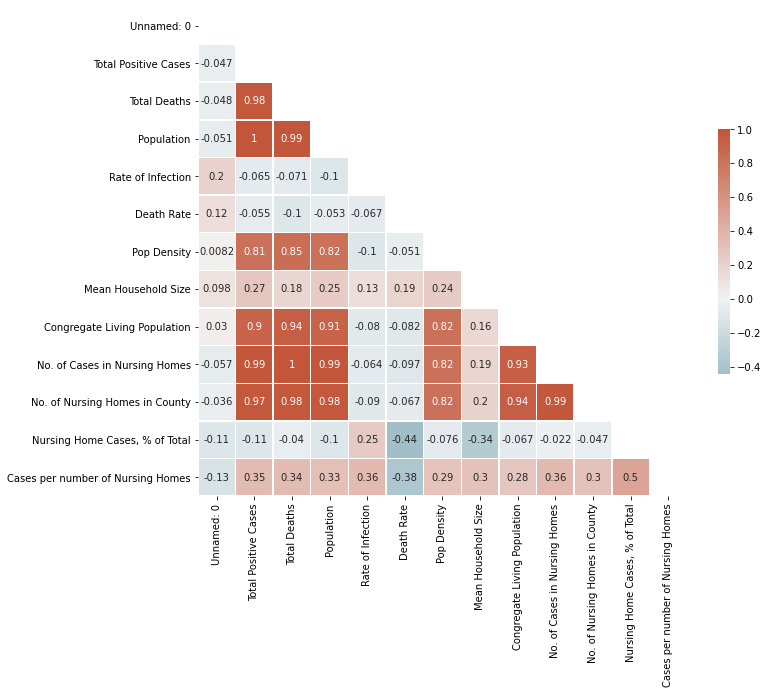

In [4]:
corr = compiledcountydata.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Analysis of the correlation matrix indicates we may have high multicollinearity between our variables.  Population, Total Positive Cases, Total Deaths and No. of Cases in Nursing Homes have an almost perfect relationship, suggesting that they are essentially measuring the same thing.  Categories which may be interesting to analyze are the Infection Rate, Death Rate, and total number of deaths.  Since Population, Total Deaths, Total Positive Cases and No. of Cases in Nursing Homes all have correlations greater than 98%, I will only include Total Deaths in my analysis as a target, and will not use the others as explaining variables.

# Section 1
### Investigation of individual variables to try to identify base correlations
We're Interested in Total Positive Cases, Rate of Infection, and Total Deaths as possible targets, will create plots of possible targets versus relevant possible features for initial analysis

In [5]:
# Helper function that allows us to select a target variable and multiple feature variables
# then plot out scatterplots for visual analysis

def plotpairgrid(dataframe, columns, target):
    pairgrid = dataframe[target + columns]
    pairgridplot = sns.PairGrid(pairgrid, y_vars=target, x_vars=columns, height = 3)
    pairgridplot.map(sns.regplot, color="green")
    pairgridplot.map(sns.scatterplot)
    pairgridplot.set(xscale="log")

### Examine relationships between rate of infection and other aggregate variables

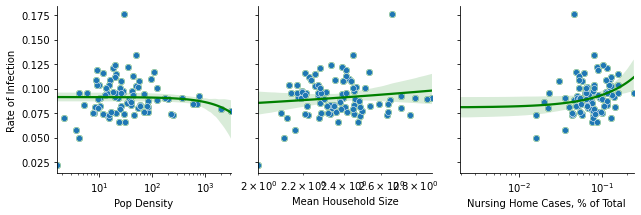

In [6]:
columns = ['Pop Density','Mean Household Size','Nursing Home Cases, % of Total']
rateofinfectiontarget = ['Rate of Infection']

plotpairgrid(compiledcountydata, columns, rateofinfectiontarget)

Rate of infection appears to be negatively impacted by pop density, and moderately positively impacted by the mean household size and nursing home case rate.

### Examine relationships between Total Deaths and population factors

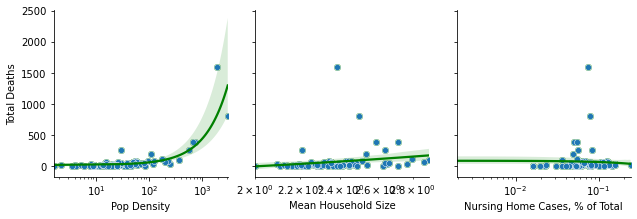

In [7]:
totaldeathtarget = ['Total Deaths']

plotpairgrid(compiledcountydata, columns, totaldeathtarget)

Total Deaths appears to have the strongest relationship with Population Density.  Mean Household size appears to have a slightly positive impact, while nursing home case rate does not appear to have a significant relationship.

### Examine relationship between Death Rate and population factors

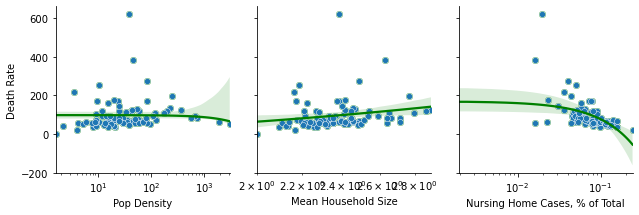

In [8]:
deathratetarget = ['Death Rate']

plotpairgrid(compiledcountydata, columns, deathratetarget)

The death rate appears to be most strongly correlated with the concentration of cases that are in nursing homes, which makes sense.  Population density seems to have zero impact on the rate of death, while mean household size actually seems to have a slightly negative relationship

# Section 2
### Multiple Linear Regression

In [9]:
# Create function for linear regression that uses columns variable and different target variables defined above

def linreg(dataframe,columns,target):
    X = dataframe[columns]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f'My R-squared value is {lr.score(X_test, y_test)}')
    print(f'My slope coefficients are {lr.coef_}')
    print(f'My intercept is {lr.intercept_}')

### 2A - Rate of infection, Linear Regression

In [10]:
linreg(compiledcountydata, columns, rateofinfectiontarget)

My R-squared value is 0.21440303006192696
My slope coefficients are [[-6.78897936e-06  3.46622321e-02  1.27466396e-01]]
My intercept is [-0.0014577]


Overall model is not effective at predicting rate of infection

### 2B - Total Deaths

In [11]:
linreg(compiledcountydata,columns,totaldeathtarget)

My R-squared value is 0.770719263426767
My slope coefficients are [[  0.41746765 -26.75269407   5.93014824]]
My intercept is [91.93297608]


Overall model is better at predicting total number of deaths.  Pop Density correlates strongly with total population and total death

### 2C - Death Rate

In [12]:
linreg(compiledcountydata,columns,deathratetarget)

My R-squared value is 0.27066635243606196
My slope coefficients are [[-1.67500206e-02  2.01178472e+01 -7.97488182e+02]]
My intercept is [112.3255502]


This model is slightly better at predicting death rate than the infection rate, however it is still not a very good predictor overall.

# Section 3
### Regression with Lasso

In [13]:
# Define a function for lasso analysis

def lassoreg(dataframe,columns,target):
    X = dataframe[columns]
    y = dataframe[target]
    clf= Lasso(alpha=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    clf.fit(X_train, y_train)
    print(f'My R-squared value is {clf.score(X_test, y_test)}')
    print(f'My slope coefficients are {clf.coef_}')
    print(f'My intercept is {clf.intercept_}')

### 3A - Lasso on Rate of Infection

In [14]:
lassoreg(compiledcountydata,columns,rateofinfectiontarget)

My R-squared value is 0.0032785238790582483
My slope coefficients are [-4.53848984e-06  0.00000000e+00  0.00000000e+00]
My intercept is [0.09115782]


Lasso analysis appears to be much worse than linear regression for this variable.

### 3B - Lasso on Total Deaths

In [15]:
lassoreg(compiledcountydata,columns,totaldeathtarget)

My R-squared value is 0.7672173926655772
My slope coefficients are [  0.41716404 -23.46232107   0.        ]
My intercept is [84.63419765]


Again, regression appears better at predicting Total Deaths rather than rate of death or rate of infection. This is a pretty good value but not as good as the linear regression.

### 3C - Lasso on Death Rate

In [16]:
lassoreg(compiledcountydata,columns,deathratetarget)

My R-squared value is 0.2574371909372213
My slope coefficients are [-1.64380344e-02  2.24936959e+01 -7.31478656e+02]
My intercept is [101.20964407]


Lasso analysis appears to be even less effective at predicting death rate than linear regression.